In [1]:
import torch
from sklearn.datasets.samples_generator import make_blobs
import numpy as np
import matplotlib.pyplot as plt


D:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# Display contour plot of f at all points (x[i],y[j])
def contour_plot1(x,y,f,n_levels):
    xx, yy = np.meshgrid(x, y)
    p=np.hstack([xx.reshape(-1,1),yy.reshape(-1,1)])
    X=torch.tensor(p,dtype=torch.float32)
    fp=f(X)
    z=fp.reshape(xx.shape).detach().numpy()
    plt.contourf(x,y,z,n_levels)

In [3]:
Xnp, ynp = make_blobs(n_samples=500, centers = [(1, 1), (5,3)], n_features=2)

X=torch.tensor(Xnp,dtype=torch.float32)
y=torch.tensor(ynp[:,np.newaxis],dtype=torch.float32)

# Use the nn package to define a model as a sequence of layers. 
# nn.Sequential is a Module which contains other Modules, 
# and applies them in sequence to produce its output. 
# Each Linear Module computes output from input using a
# linear function, and holds internal Tensors for its weight and bias.
model = torch.nn.Sequential(
    torch.nn.Linear(2, 1),
    torch.nn.Sigmoid()
)

# Use Binary Cross Entropy as loss function.
loss_fn = torch.nn.BCELoss()

n_its=10000  # Number of iterations
learning_rate = 0.1
for t in range(n_its):
    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Tensor of input data to the Module and it produces
    # a Tensor of output data.
    y_pred = model(X)

    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(y_pred, y)
    if ((t+1)%200==0):  # Print every 200th result
        print(t+1, loss.item())

    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

200 0.24286460876464844
400 0.15986864268779755
600 0.12593992054462433
800 0.10715438425540924
1000 0.09505595266819
1200 0.0865296870470047
1400 0.08015128970146179
1600 0.07517287880182266
1800 0.07116217911243439
2000 0.06785089522600174
2200 0.06506304442882538
2400 0.06267816573381424
2600 0.0606108121573925
2800 0.05879853665828705
3000 0.057194653898477554
3200 0.05576333403587341
3400 0.05447683110833168
3600 0.05331314355134964
3800 0.052254609763622284
4000 0.05128680169582367
4200 0.050397902727127075
4400 0.0495782345533371
4600 0.04881960153579712
4800 0.04811503365635872
5000 0.04745863750576973
5200 0.046845417469739914
5400 0.04627102613449097
5600 0.04573168233036995
5800 0.0452241487801075
6000 0.044745489954948425
6200 0.04429319128394127
6400 0.04386509582400322
6600 0.04345910623669624
6800 0.043073561042547226
7000 0.04270683228969574
7200 0.04235750809311867
7400 0.042024336755275726
7600 0.041706159710884094
7800 0.04140188544988632
8000 0.04111069068312645
820

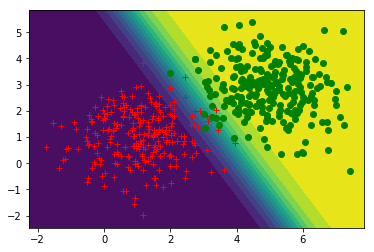

In [4]:
# Create a grid of points
px = np.arange(Xnp[:,0].min()-0.5, Xnp[:,0].max()+0.5, 0.1)
py = np.arange(Xnp[:,1].min()-0.5, Xnp[:,1].max()+0.5, 0.1)

# Use different colours for different classes
X0=Xnp[ynp==0] # Select samples for class 0
X1=Xnp[ynp==1] # Select samples for class 1
plt.plot(X0[:,0],X0[:,1],"+",color="red")
plt.plot(X1[:,0],X1[:,1],"o",color="green")
contour_plot1(px,py,model,15)